In [1]:
import simpy
import numpy as np
import sys
from scipy import interpolate
from IPython.core.debugger import set_trace
import pandas as pd
import matplotlib.pyplot as plt

In [55]:
from virtualphysiology.organ.circulation import Tubo
from virtualphysiology.organ.heart import Heart

In [56]:
def graficos(system, title, init):
    a=system['arteria'].getDataFrame()[init:]
    c=system['capilar'].getDataFrame()[init:]
    v=system['vena'].getDataFrame()[init:]
    h=system['corazon'].getDataFrame()[init:]

    plt.title('Presión '+ title)
    plt.plot(a['p'],label='arteria')
    plt.plot(c['p'],label='capilar')
    plt.plot(v['p'],label='vena')
    plt.plot(h['p'],label='corazon')
    plt.legend(loc='upper right')
    plt.rcParams['figure.dpi'] = 150
    plt.show()

    plt.title('Volumen '+ title)
    plt.plot(a['V'],label='arteria')
    plt.plot(c['V'],label='capilar')
    plt.plot(v['V'],label='vena')
    plt.plot(h['V'],label='corazon')
    plt.plot(a['V']+c['V']+v['V']+h['V'],label='Vol. total')
    plt.legend(loc='upper right')
    plt.rcParams['figure.dpi'] = 150
    plt.show()

def graficos2(system, title, init):
    a=system['arteria'].getDataFrame()[init:]
    c=system['capilar'].getDataFrame()[init:]
    v=system['vena'].getDataFrame()[init:]
    h=system['corazon'].getDataFrame()[init:]

    plt.title('Presión '+ title)
    plt.plot(a['p'],label='arteria')
    plt.plot(c['p'],label='capilar')
    plt.plot(v['p'],label='vena')
    plt.legend(loc='upper right')
    plt.rcParams['figure.dpi'] = 150
    plt.show()

    plt.title('Volumen '+ title)
    plt.plot(a['V'],label='arteria')
    plt.plot(c['V'],label='capilar')
    plt.plot(v['V'],label='vena')
    plt.plot(a['V']+c['V']+v['V']+h['V'],label='Vol. total')
    plt.legend(loc='upper right')
    plt.rcParams['figure.dpi'] = 150
    plt.show()

     Ed    Es  HR     R         V  Vb input   output         p  periodo  time
0  0.06  0.06  60  0.06  1.000000  17  vena  arteria -0.960000     0.01  0.00
1  0.06  0.06  60  0.06  1.778947  17  vena  arteria -0.913263     0.01  0.01
2  0.06  0.06  60  0.06  2.541323  17  vena  arteria -0.867521     0.01  0.02
3  0.06  0.06  60  0.06  3.287784  17  vena  arteria -0.822733     0.01  0.03
4  0.06  0.06  60  0.06  4.018964  17  vena  arteria -0.778862     0.01  0.04


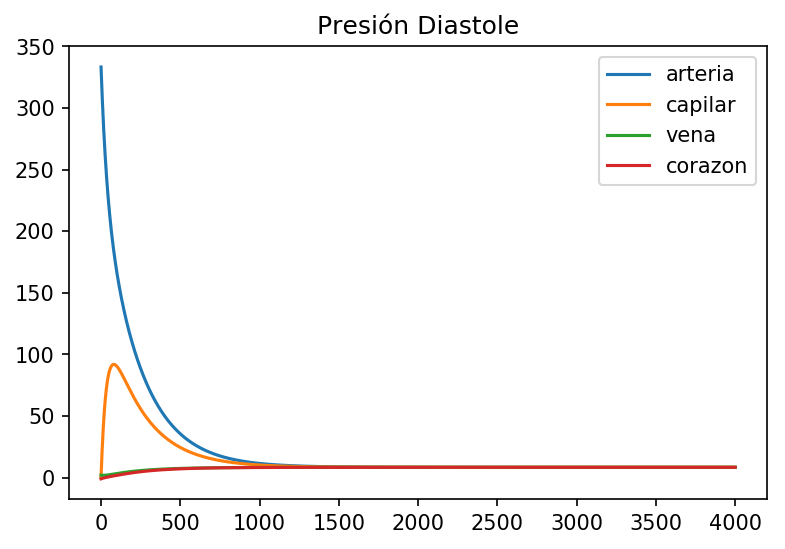

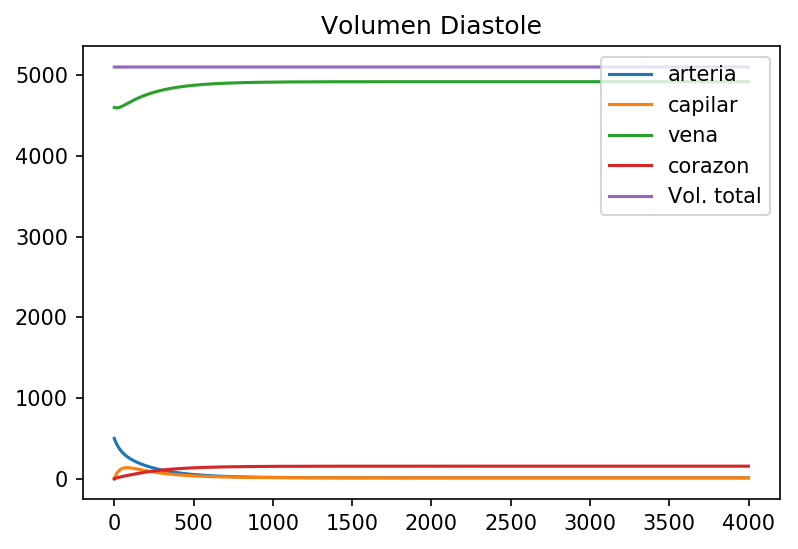

In [80]:
# Diastole

env = simpy.Environment()
system = {}
per = 0.01
system['arteria'] = Tubo(env, system, V0=500,E=1/1.5,R=0.06,Vb=0,tubos=[("corazon",1),("capilar",0)],periodo = per)
system['capilar'] = Tubo(env, system, V0=0,E=1/1.5,R=1.2,Vb=0,tubos=[("arteria",0),("vena",0)],periodo = per)
system['vena'] = Tubo(env, system, V0=4600,E=1/50,R=0.016,Vb=4500,tubos=[("capilar",0),("corazon",-1)],periodo = per)
system['corazon'] = Heart(env, system, HR=60, Es=0.06, Ed=0.06, V0=1,R=0.06,Vb=17,LVin="vena",
    LVout="arteria",periodo = per)

env.run(until=40)

print(system['corazon'].getDataFrame().head())

graficos(system,'Diastole',init=0)

             E     R          V  Vb          p  periodo   time  \
3995  0.666667  0.06  16.425009   0  10.950006     0.01  39.95   
3996  0.666667  0.06  16.425008   0  10.950006     0.01  39.96   
3997  0.666667  0.06  16.425008   0  10.950006     0.01  39.97   
3998  0.666667  0.06  16.425008   0  10.950006     0.01  39.98   
3999  0.666667  0.06  16.425008   0  10.950006     0.01  39.99   

                             tubos  
3995  [(corazon, 1), (capilar, 0)]  
3996  [(corazon, 1), (capilar, 0)]  
3997  [(corazon, 1), (capilar, 0)]  
3998  [(corazon, 1), (capilar, 0)]  
3999  [(corazon, 1), (capilar, 0)]  


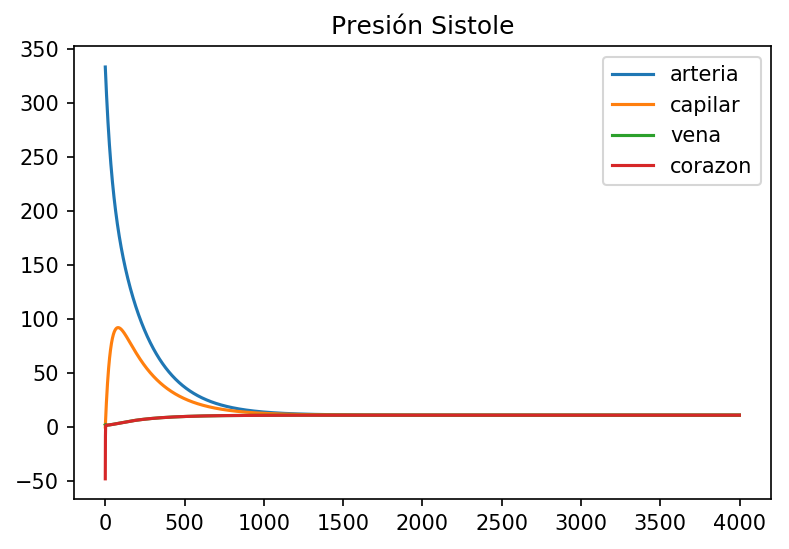

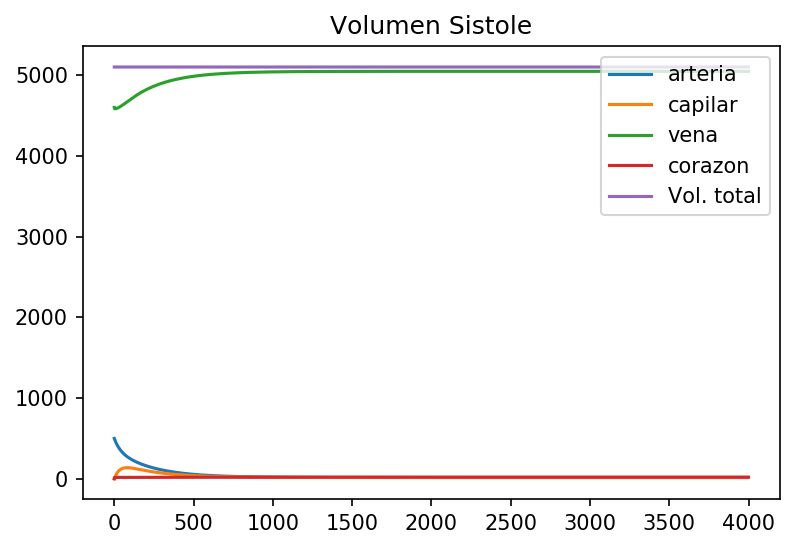

In [75]:
# Sistole

env = simpy.Environment()
system = {}
per = 0.01
system['arteria'] = Tubo(env, system, V0=500,E=1/1.5,R=0.06,Vb=0,tubos=[("corazon",1),("capilar",0)],periodo = per)
system['capilar'] = Tubo(env, system, V0=0,E=1/1.5,R=1.2,Vb=0,tubos=[("arteria",0),("vena",0)],periodo = per)
system['vena'] = Tubo(env, system, V0=4600,E=1/50,R=0.016,Vb=4500,tubos=[("capilar",0),("corazon",-1)],periodo = per)
system['corazon'] = Heart(env, system, HR=60, Es=3, Ed=3, V0=1,R=0.06,Vb=17,LVin="vena",
    LVout="arteria",periodo = per)

env.run(until=40)

print(system['arteria'].getDataFrame().tail())

graficos(system,'Sistole',init=0)

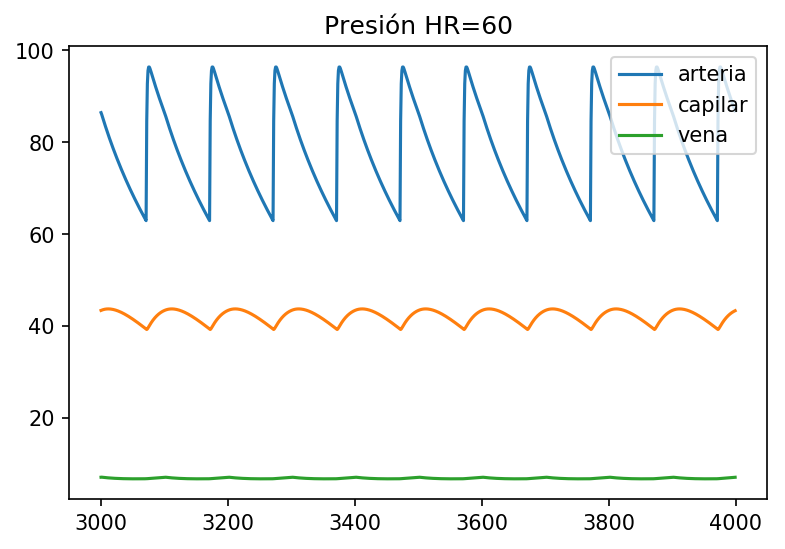

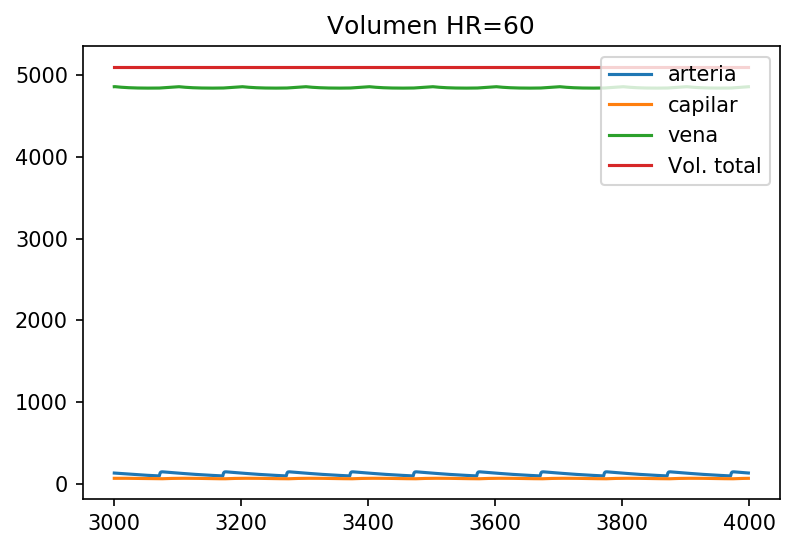

In [60]:
# HR 

env = simpy.Environment()
system = {}
per = 0.01
system['arteria'] = Tubo(env, system, V0=500,E=1/1.5,R=0.06,Vb=0,tubos=[("corazon",1),("capilar",0)],periodo = per)
system['capilar'] = Tubo(env, system, V0=0,E=1/1.5,R=1.2,Vb=0,tubos=[("arteria",0),("vena",0)],periodo = per)
system['vena'] = Tubo(env, system, V0=4600,E=1/50,R=0.016,Vb=4500,tubos=[("capilar",0),("corazon",-1)],periodo = per)
system['corazon'] = Heart(env, system, HR=60, Es=3, Ed=0.06, V0=1,R=0.06,Vb=17,LVin="vena",
    LVout="arteria",periodo = per)

env.run(until=40)

graficos2(system,'HR=60',init=3000)